# 📈 Gold Price Prediction Using Multiple Regression Models  

## **Introduction**  
Gold is one of the most valuable commodities in global financial markets, and its price is influenced by multiple factors such as inflation, currency exchange rates, and geopolitical events. Predicting gold prices accurately can help investors and policymakers make informed decisions.  

In this project, we use **multiple regression models** to analyze and predict gold prices based on historical data. We will implement and compare the following machine learning algorithms:  

- **Linear Regression**
- **Ridge & Lasso Regression**
- **Support Vector Regression (SVR)**  
- **Decision Tree & Random Forest Regression**  
- **Gradient Boosting (GBR, XGBoost, LightGBM)**

The goal is to identify the most accurate model for gold price prediction by evaluating key performance metrics such as **Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score**.  

By the end of this notebook, we will determine which model provides the best results and discuss its practical applications in financial forecasting. 🚀  


**Import Required Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import kagglehub
import os

**Dataset Loading**

In [5]:
# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset file:", path)

df = pd.read_csv(path+"/gld_price_data.csv")
df.set_index('Date', inplace=True)  # Set as index for time series analysis

print("Dataset loaded successfully")

100%|██████████| 41.9k/41.9k [00:00<00:00, 1.42MB/s]

Extracting files...
Path to dataset file: /root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1
Dataset loaded successfully


**Exploratory Data Analysis (EDA)**

In [21]:
# Dataset structure
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

Dataset Shape: (2290, 5)

Column Names: ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']


In [22]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [23]:
# Check data types
print("\nData Types:\n", df.dtypes)


Data Types:
 SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [24]:
# Summary statistics
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
                SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


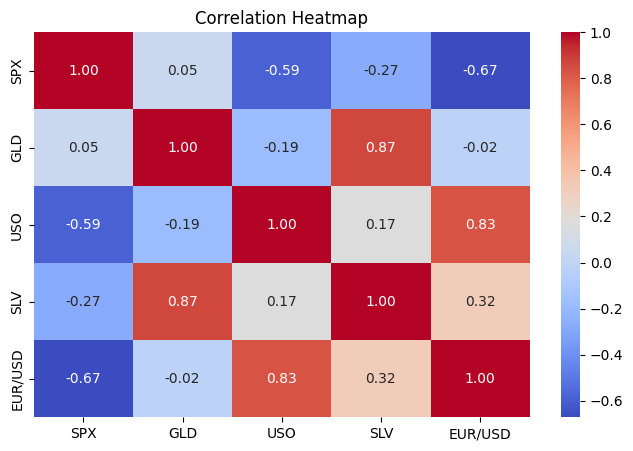

In [25]:
# Correlation heatmap representing the relationships between variables
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

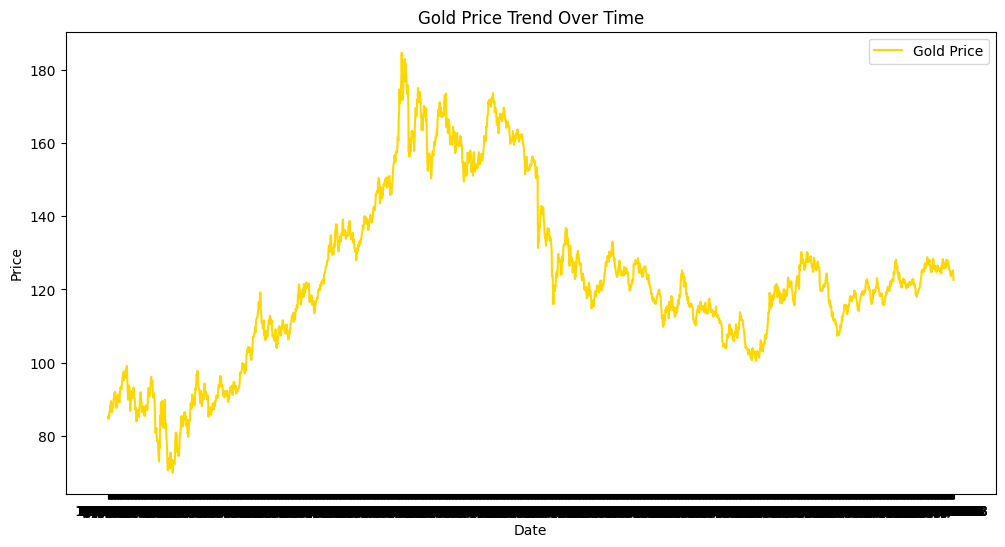

In [26]:
# Visualize how gold prices change over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['GLD'], label="Gold Price", color='gold')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Gold Price Trend Over Time")
plt.legend()
plt.show()

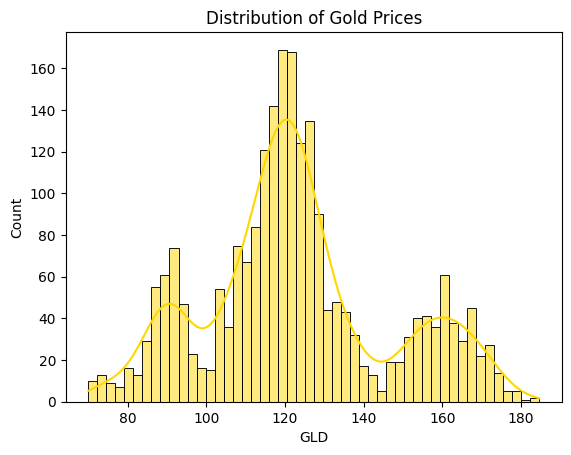

In [10]:
# Check the distribution of gold prices.
sns.histplot(df['GLD'], bins=50, kde=True, color='gold')
plt.title("Distribution of Gold Prices")
plt.show()

**Data Preprocessing**

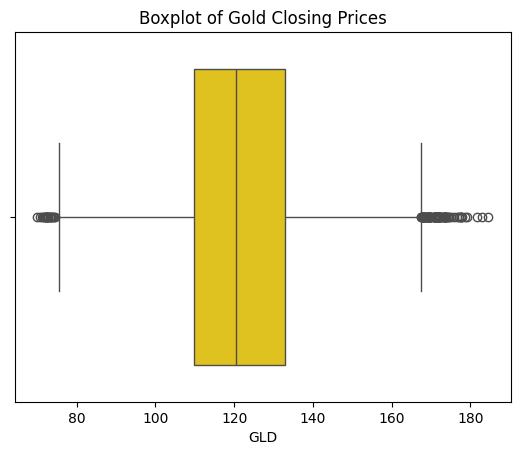

In [11]:
sns.boxplot(x=df['GLD'], color='gold')
plt.title("Boxplot of Gold Closing Prices")
plt.show()

**Feature Engineering**

In [6]:
df.index = pd.to_datetime(df.index)

# Performing feature transformation & selection to extract numerical features from the datetime index
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

# Selecting numerical features for all models
X = df[['Year', 'Month', 'Day', 'DayOfWeek']].values
y = df['GLD'].values


# Select Features
X = df[['Year', 'Month', 'Day', 'DayOfWeek']].values

y = df['GLD'].values

In [7]:
# XGBoost & LightGBM) require float32
X = X.astype(np.float32)
y = y.astype(np.float32)

**Model Training & Evaluation**

In [8]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [12]:
# XGBoost Regression
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [13]:
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 4
[LightGBM] [Info] Start training from score 122.901138


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMRegressor(random_state=42)

In [14]:
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gbr_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model
}

**Comparison & Conclusion**

In [24]:
def evaluate_model(X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name}: MSE = {mse:.2f}, R² = {r2:.2f}")

In [25]:
# Evaluate each model
evaluate_model(X_test, y_test)

Decision Tree: MSE = 3.48, R² = 0.99
Random Forest: MSE = 3.28, R² = 0.99
Gradient Boosting: MSE = 17.50, R² = 0.97
XGBoost: MSE = 5.16, R² = 0.99
LightGBM: MSE = 6.40, R² = 0.99


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
